# Problemas parcial 1

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

## Derivación

### Problema 5

(**Theoretical**) Show that the $D^{4}f$ operator is given by:
$$
D^4f(x_{j})≅\frac{f(x_{j+2})-4f(x_{j+1})+6f(x_{j})-4f(x_{j-1})+f(x_{j-2})}{h^4}
$$
For this operator, what is the order $(O(h^k))$ of the approximation?

En primer lugar, se tiene que la primera derivada de $f(x)$ es
$$
f'(x)=\frac{f(x+1)-f(x)}{h}
$$

Luego, la segunda derivada será
$$
f''(x)=\frac{f'(x+1)-f'(x)}{h}=\frac{\frac{f(x+1+1)-f(x+1)}{h}-\frac{f(x+1)-f(x)}{h}}{h}
$$

$$
f''(x)=\frac{f(x+2)-2f(x+1)+f(x)}{h^2}
$$

$$
f''(x)=\frac{f(x_{j+1})-2f(x_{j})+f(x_{j-1})}{h^2}
$$

Como las derivadas pares presentan simetría entre sí, y usando la notación de discretización de puntos nodales, se tiene que la cuarta derivada corresponde a la segunda derivada evaluada en sí misma

$$
f^{IV}(x)=\frac{f''(x_{j+1})-2f''(x_{j})+f''(x_{j-1})}{h^2}
$$

De esta manera, se tiene
$$
f''(x_{j+1})=\frac{f(x_{j+1+1})-2f(x_{j+1})+f(x_{j+1-1})}{h^2}=\frac{f(x_{j+2})-2f(x_{j+1})+f(x_{j})}{h^2}
$$

$$
f''(x_{j})=\frac{f(x_{j+1})-2f(x_{j})+f(x_{j-1})}{h^2}
$$

$$
f''(x_{j-1})=\frac{f(x_{j-1+1})-2f(x_{j-1})+f(x_{j-1-1})}{h^2}=\frac{f(x_{j})-2f(x_{j-1})+f(x_{j-2})}{h^2}
$$

Reemplazando, la derivada queda como
$$
f^{IV}(x)=\frac{\frac{f(x_{j+2})-2f(x_{j+1})+f(x_{j})}{h^2}-2\frac{f(x_{j+1})-2f(x_{j})+f(x_{j-1})}{h^2}+\frac{f(x_{j})-2f(x_{j-1})+f(x_{j-2})}{h^2}}{h^2}
$$

$$
f^{IV}(x)=\frac{\frac{f(x_{j+2})-2f(x_{j+1})+f(x_{j})-2f(x_{j+1})+4f(x_{j})-2f(x_{j-1})+f(x_{j})-2f(x_{j-1})+f(x_{j-2})}{h^2}}{h^2}
$$

$$
f^{IV}(x)=\frac{f(x_{j+2})-4f(x_{j+1})+6f(x_{j})-4f(x_{j-1})+f(x_{j-2})}{h^4}
$$

\
Por otro lado, según la serie de Taylor, se tiene que el error de la estimación para $f(x)$ es $h_{0}=\frac{h^0}{2!}$\
Además, el error para $f'(x)$ es $h_{1}=\frac{h^1}{2!}$
\
De esta manera, se puede calcular los errores para las siguientes derivadas multiplicando los errores de las dos derivadas anteriores.\
Así, se tiene que el error de la segunda derivada es
$$
h_{2}=h_{0}×h_{1}=\frac{h^0}{2!}×\frac{h^1}{2!}=\frac{h^1}{(2!)^2}
$$

Luego, el error de la tercera derivada es
$$
h_{3}=h_{1}×h_{2}=\frac{h^1}{2!}×\frac{h^1}{(2!)^2}=\frac{h^2}{(2!)^3}
$$

Finalmente, el error de la cuarta derivada es
$$
h_{4}=h_{2}×h_{3}=\frac{h^1}{(2!)^2}×\frac{h^2}{(2!)^3}=\frac{h^3}{(2!)^4}
$$

Por lo tanto, se tiene que el error de la aproximación es de tercer orden.

### Problema 8

Es posible construir una aproximación de orden O(h^2) para la derivada progresiva. Para tal propósito, se escribe el polinomio de interpolación de grado 2 para el conjunto soporte $\Omega = {(x_{0},f(x_{0})),(x_{1},f(x_{1})),(x_{2},f(x_{2}))}$, y posteriormente se calcula la derivada de este polinomio.

In [131]:
x=np.linspace(0.1,1.1,100)
h=0.01

**a)** Calcular analíticamente el polinomio que interpola el conjunto soporte.
    En primer lugar, se deben calcular las bases polinómicas del polinomio
    $$
    L_{0}=\frac{(x-x_{1})(x-x_{2})}{(x_{0}-x_{1})(x_{0}-x_{2})}\\
    L_{1}=\frac{(x-x_{0})(x-x_{2})}{(x_{1}-x_{0})(x_{1}-x_{2})}\\
    L_{2}=\frac{(x-x_{0})(x-x_{1})}{(x_{2}-x_{0})(x_{2}-x_{1})}\\
    $$
    \
    Con estas, se puede calcular el polinomio como sigue:
    $$
    P_{3}=f(x_{0})L_{0}+f(x_{1})L_{1}+f(x_{2})L_{2}
    $$
    $$
    P_{3}=f(x_{0})\frac{(x-x_{1})(x-x_{2})}{(x_{0}-x_{1})(x_{0}-x_{2})}+f(x_{1})\frac{(x-x_{0})(x-x_{2})}{(x_{1}-x_{0})(x_{1}-x_{2})}+f(x_{2})\frac{(x-x_{0})(x-x_{1})}{(x_{2}-x_{0})(x_{2}-x_{1})}
    $$
    $$
    P_{3}=f(x_{0})×\frac{x^2-(x_{1}+x_{2})x+x_{1}x_{2}}{x_{0}^2-(x_{1}+x_{2})x_{0}+x_{1}x_{2}}
    +
    f(x_{1})×\frac{x^2-(x_{0}+x_{2})x+x_{0}x_{2}}{x_{1}^2-(x_{0}+x_{2})x_{1}+x_{0}x_{2}}
    +
    f(x_{2})×\frac{x^2-(x_{0}+x_{1})x+x_{0}x_{1}}{x_{2}^2-(x_{0}+x_{1})x_{2}+x_{0}x_{1}}
    $$    
    $$
    P_{3}=\frac{f(x_{0})x^2-(x_{1}+x_{2})f(x_{0})x+x_{1}x_{2}f(x_{0})}{x_{0}^2f(x_{0})-(x_{1}+x_{2})x_{0}f(x_{0})+x_{1}x_{2}f(x_{0})}
    +
    \frac{f(x_{1})x^2-(x_{0}+x_{2})f(x_{1})x+x_{0}x_{2}f(x_{1})}{x_{1}^2f(x_{1})-(x_{0}+x_{2})x_{1}f(x_{1})+x_{0}x_{2}f(x_{1})}
    +
    \frac{f(x_{2})x^2-(x_{0}+x_{1})f(x_{2})x+x_{0}x_{1}f(x_{2})}{x_{2}^2f(x_{2})-(x_{0}+x_{1})x_{2}f(x_{2})+x_{0}x_{1}f(x_{2})}
    $$

**b)** Derivar el polinomio interpolador para encontrar la derivada en el punto $x_{0}$:\
    $$
    f'(x_{0})≈p'(x_{0})=\frac{1}{2h}(-3f(x_{0})+4f(x_{1})-f(x_{2}))
    $$
    Si la discretización es equidistante, tenemos:
    $$
    f'(x)≅\frac{1}{2h}(-3f(x)+4f(x+h)-f(x+2h))
    $$
    De esta manera, se tiene:
    $$
    P'(x)=f(x_{0})\frac{(x-x_{1})+(x-x_{2})}{(x_{0}-x_{1})(x_{0}-x_{2})}+f(x_{1})\frac{(x-x_{0})+(x-x_{2})}{(x_{1}-x_{0})(x_{1}-x_{2})}+f(x_{2})\frac{(x-x_{0})+(x-x_{1})}{(x_{2}-x_{0})(x_{2}-x_{1})}
    $$
    Sabiendo que $x=x_{0}$ $x_{1}=x_{0}+h$ y $x_{2}=x_{0}+2h$
    \
    Se puede simplificar reemplazando
    $$
    P'(x)=f(x_{0})\frac{(x_{0}-x_{0}-h)+(x_{0}-x_{0}-2h)}{(x_{0}-x_{0}-h)(x_{0}-x_{0}-2h)}+f(x_{1})\frac{(x_{0}-x_{0})+(x_{0}-x_{0}-2h)}{(x_{0}+h-x_{0})(x_{0}+h-x_{0}-2h)}+f(x_{2})\frac{(x_{0}-x_{0})+(x_{0}-x_{0}-h)}{(x_{0}+2h-x_{0})(x_{0}+2h-x_{0}-h)}
    $$
    $$
    P'(x)=f(x_{0})\frac{-3h}{(-h)(-2h)}+f(x_{1})\frac{-2h}{(h)(-h)}+f(x_{2})\frac{-h}{(2h)(h)}
    $$
    $$
    P'(x)=f(x_{0})\frac{-3}{2h}+f(x_{1})\frac{2}{h}+f(x_{2})\frac{-1}{2h}
    $$
    $$
    P'(x)=f(x_{0})\frac{-3}{2h}+f(x_{1})\frac{4}{2h}-f(x_{2})\frac{1}{2h}
    $$
    $$
    P'(x)=\frac{1}{2h}[-3f(x_{0})+4f(x_{1})-f(x_{2})]
    $$

**c)** **(Python)** Para $f(x)= \sqrt{tan(x)}$ estimar la derivada progresiva de orden $O(h^2)$ (expresión anterior) en el intervalo $[0.1; 1.1]$ con $h=0.01$.

In [127]:
def funcion(t):
    f=np.sqrt(np.tan(t))
    return f

def progresiva(f,t):
    derivada=(1/(2*h))*(-3*f(t)+4*f(t+h)-f(t+2*h))
    return derivada

der_progre=progresiva(funcion, x)

**d)** **(Python)** Para $f(x)=\sqrt{tan(x)}$ estimar la derivada central de orden $O(h^2)$ en el intervalo $[0.1; 1.1]$ con $h=0.01$.

In [128]:
def DerivadaCentral(f,t):
    d = 0
    if h != 0:
        d=(f(t+h) - f(t-h))/(2*h)
        
    return d

der_cent=DerivadaCentral(funcion,x)

**e)** Calcule analíticamente la derivada de la función $f(x)$, y grafique con la estimación central y progresiva de orden $O(h^2)$.\
La derivada de $f(x)$ corresponde a
$$
f'(x)=\frac{[tan(x)]'}{2\sqrt{tan(x)}}
$$
$$
f'(x)=\frac{sec^2(x)}{2\sqrt{tan(x)}}
$$

<Figure size 5760x2880 with 0 Axes>

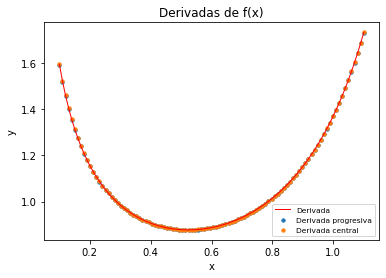

<Figure size 5760x2880 with 0 Axes>

In [142]:
def derivada(x):
    numerador=1/np.cos(x)
    numerador **= 2
    denominador=np.sqrt(np.tan(x))
    denominador *= 2
    resultado = numerador/denominador
    return resultado

der = derivada(x)

plt.plot(x,der, label="Derivada", color="red", linewidth=1)
plt.scatter(x,der_progre, label="Derivada progresiva",s=11)
plt.scatter(x,der_cent, label="Derivada central", s=11)
plt.legend(prop={'size':7.5}, loc='lower right')
plt.title("Derivadas de f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.figure(figsize=(80,40))


**f)** Grafique el error nodal para ambas aproximaciones. ¿Tienen efectivamente el mismo orden de precisión ambos resultados?


Las derivadas tienen el mismo orden de precisión


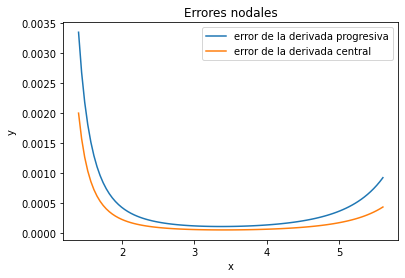

<Figure size 5760x2880 with 0 Axes>

In [152]:
error_progre=abs(der-der_progre)
error_cent=abs(der-der_cent)
plt.plot(x,error_progre, label="error de la derivada progresiva")
plt.plot(x,error_cent, label="error de la derivada central")
plt.legend(prop={'size':10}, loc='upper right')
plt.title("Errores nodales")
plt.xlabel("x")
plt.ylabel("y")
plt.figure(figsize=(80,40))
print("Las derivadas tienen el mismo orden de precisión")

## Raíces de polinomios
### Problema 3
Calcular todas las raíces reales de:
$$
f(x)=3x^5+5x^4-x^3
$$

In [153]:
def derivar_funcion(funcion):
    
    # Define la variable simbólica x
    x = sym.symbols('x')

    # Calcula la derivada de la función con respecto a x
    derivada = sym.diff(funcion(x), x)

    # Convierte la derivada en una función numérica
    derivada_funcion = sym.lambdify(x, derivada, 'numpy')

    return derivada_funcion

def Hallar_raices_rango(Funcion, rango, tol=1e-9, max_iter=100):
    """
    Encuentra las raíces de una función en un rango utilizando el método de Newton-Raphson.

    Parámetros:
    Funcion (función): La función de la cual quieres encontrar las raíces.
    rango (tuple): El rango (inicio, fin) en el que buscar raíces.
    tol (float): Tolerancia para el criterio de parada (por defecto es 1e-6).
    max_iter (int): Número máximo de iteraciones por raíz (por defecto es 100).

    Retorna:
    raices (list): Una lista de las raíces encontradas o None si no se encuentran raíces en el rango.
    """
    raices = []
    inicio, fin = rango
    raices_encontradas = False

    dF = derivar_funcion(Funcion)

    for x_inicial in range(int(inicio), int(fin) + 1):
        x = x_inicial
        for _ in range(max_iter):
            derivada_x = dF(x)

            if abs(derivada_x) < 1e-10:
                break

            x_new = x - (Funcion(x) / derivada_x)
            if abs(x_new - x) < tol:
                raices.append(x_new)
                raices_encontradas = True
                break
            x = x_new

    if raices_encontradas:
        return raices
    else:
        return None

def Hallar_raices_suponiendo(Funcion, suposiciones_iniciales, tol=1e-9, max_iter=100):
    """
    Encuentra las raíces de una función utilizando el método de Newton-Raphson con suposiciones iniciales.

    Parámetros:
    Funcion (función): La función de la cual quieres encontrar las raíces.
    suposiciones_iniciales (list): Una lista de suposiciones iniciales para las raíces.
    tol (float): Tolerancia para el criterio de parada (por defecto es 1e-6).
    max_iter (int): Número máximo de iteraciones por raíz (por defecto es 100).

    Retorna:
    raices (list): Una lista de las raíces encontradas.
    """
    raices = []
    dF = derivar_funcion(Funcion)

    for suposicion_inicial in suposiciones_iniciales:
        x = suposicion_inicial

        # Evita la división por cero
        if abs(dF(x)) < 1e-10:
            continue

        for _ in range(max_iter):
            x_new = x - Funcion(x) / dF(x)
            if abs(x_new - x) < tol:
                raices.append(x_new)
                break
            x = x_new
        else:
            raise ValueError(f"El método de Newton-Raphson no convergió para la suposición inicial {suposicion_inicial}.")

    return raices
    
# Define la función
def funcion_ejemplo(x):
    return (3*x**5) + (5*x**4) - (x**3)

"""
Tolerancia = Tolerancia del criterio de parada (Hasta que decimal busca)
Num_iteraciones = Número máximo de iteraciones por raíz (Cantidad de veces que busca una raiz)
Tolerancia_filtos = Elimina cualquier cantidad de raices que sean diferentes en apenas sus ultimos decimales
                    (Los ultimos 1e^n decimales) 
"""
tolerancia = 1e-9
Num_iteraciones = 100
tolerancia_filtros = 1e1

# Rango en el que buscar raíces
rango = (-100, 100)  # Modificado para evitar valores cercanos a cero en el rango

# Valores que sean posibles raíces
suposiciones_iniciales = [-10.0, 5.0, 3.0]  # Modificado para evitar el valor 0

try:
    # Encuentra las raíces en el rango usando el método de Newton-Raphson
    raices_rango = Hallar_raices_rango(funcion_ejemplo, rango,tolerancia,Num_iteraciones)

    # Encuentra las raíces cerca de las suposiciones
    raices_supuestas = Hallar_raices_suponiendo(funcion_ejemplo, suposiciones_iniciales,tolerancia,Num_iteraciones)

    # Filtra las raíces que han convergido (tolerancia baja)
    raices_convergentes_rango = [raiz for raiz in raices_rango if abs(funcion_ejemplo(raiz)) < tolerancia_filtros]
    raices_convergentes_supuestas = [raiz for raiz in raices_supuestas if abs(funcion_ejemplo(raiz)) < tolerancia_filtros]

    print(f"Raíces convergentes encontradas en el rango: {raices_convergentes_rango}")
    print(f"Raíces convergentes encontradas cerca de las suposiciones: {raices_convergentes_supuestas}")
except ValueError as e:
    print(e)

Raíces convergentes encontradas en el rango: [-1.8471270883830362, -1.8471270883830364, -1.8471270883830366, -1.8471270883830366, -1.8471270883830369, -1.8471270883830364, -1.8471270883830369, -1.8471270883830364, -1.8471270883830366, -1.8471270883830366, -1.8471270883830366, -1.8471270883830366, -1.8471270883830364, -1.8471270883830366, -1.8471270883830366, -1.8471270883830366, -1.8471270883830366, -1.8471270883830369, -1.8471270883830366, -1.8471270883830366, -1.8471270883830364, -1.8471270883830369, -1.8471270883830364, -1.8471270883830369, -1.8471270883830366, -1.8471270883830369, -1.8471270883830366, -1.8471270883830366, -1.8471270883830369, -1.8471270883830369, -1.8471270883830369, -1.8471270883830364, -1.8471270883830366, -1.8471270883830366, -1.8471270883830369, -1.8471270883830369, -1.8471270883830366, -1.8471270883830369, -1.8471270883830366, -1.8471270883830369, -1.8471270883830366, -1.8471270883830366, -1.8471270883830369, -1.8471270883830364, -1.8471270883830364, -1.847127

## Interpolación de Lagrange
### Problema 4
En el lanzamiento de una bala, una cámara fotográfica registra las siguientes posiciones en metros respecto al arma homicida (tome $g = -9.8 m/s^2 \hat{j}$):
https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv

Estime el vector velocidad inicial, que estará definido por la magnitud y dirección. Rpta: $V_{0}=10 m/s$ y $\theta=20º$. Hint: Encuentre el termino lineal y cuadrático de la interpolación y compare con la ecuación de trayectoria de la bala.

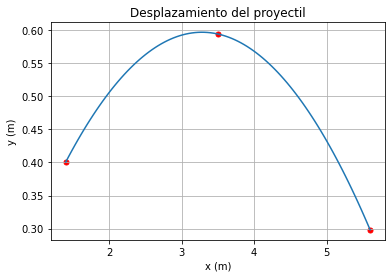

In [154]:
X=np.array([1.4, 3.5, 5.6])
Y=np.array([0.4007954931819738, 0.594128102489774, 0.29802795523938164])

def Lagrange(x,X,i):
    L = 1
    
    for j in range(X.shape[0]):
        if i != j:
            L *= (x - X[j])/(X[i]-X[j])
    return L

def Interpolate(x,X,Y):
    Poly = 0
    
    for i in range(X.shape[0]):
        Poly += Lagrange(x,X,i)*Y[i]
        
    return Poly

x=np.linspace(1.4,5.6,100)
funcion=Interpolate(x,X,Y)

_x = sym.Symbol('x',real=True)
BasesCardinales = []
for i in range(X.shape[0]):
    BasesCardinales.append(Lagrange(_x,X,i))
BasesCardinales

_y=Interpolate(_x,X,Y)

f=sym.simplify(_y)
f

plt.plot(x,funcion)
plt.scatter(X,Y,color="red",s=25)
plt.title("Desplazamiento del proyectil")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid(True)

In [49]:
xu = sym.Symbol('x',real=True)
fu = sym.simplify(Interpolate(xu,X,Y))
fu

x*(0.363970234266202 - 0.0554912422401579*x)

In [50]:
lineal = 0.36397
cuad = -0.05549
g = -9.8

La ecuación del movimiento de proyectiles está dada por
$$
y(x)=tan(\theta)+\frac{g}{2V_{o}^2cos(\theta)^2}
$$

#### Vector velocidad
El segundo término corresponde al término cuadrático de la interpolación (b). Es decir
$$
b=\frac{g}{2V_{o}^2cos(\theta)^2}\\
V_{o}^2=\frac{g}{2bcos(\theta)^2}\\
V_{o}= \sqrt{\frac{g}{2bcos(\theta)^2}}
$$

#### Ángulo de tiro
El primer término corresponde al término lineal de la interpolación (a). Es decir
$$
a=tan(\theta)\\
a=tan(\theta)=\frac{y}{x}\\
a=\frac{y}{x}
$$

In [59]:
theta=np.arctan(lineal)
theta_grad=np.degrees(theta)
theta_grad=round(theta_grad, 1)


coseno=np.cos(theta)
coseno **=2
vel=np.sqrt(g/(2*cuad*coseno))
vel=round(vel,1)

print("La velocidad inicial del proyectil tiene un valor de", vel, "m/s con un ángulo de", theta_grad, "º")

La velocidad inicial del proyectil tiene un valor de 10.0 m/s con un ángulo de 20.0 º
